# Ensemble classifiers

NOTA IMPORTANTE. Per ora considerare solo Bagging e AdaBoost che sono i metodi trattati nel corso

In [1]:
import statistics
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from classification_utils import *
from sklearn.model_selection import cross_validate
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
import statistics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
import pickle

In [25]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std']


In [26]:
data.head()

,name,lang,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1550858442,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903
2358850842,Lourie Botton,en,1551150152,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495
137959629,Dadan Syarifudin,en,1430377796,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1484707758,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008
2571493866,MBK Ebook,en,1560886221,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619


## Bagging

In [5]:
param_grid = {
                'n_estimators': np.arange(2, 40, 1),
                'max_features': [0.7, 0.8, 0.85, 0.9, 1.0],
                'max_samples': [0.7, 0.8, 0.85, 0.9, 1.0]
             }

bagging = BaggingClassifier()

grid = GridSearchCV(
    bagging,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

Fitting 3 folds for each of 950 candidates, totalling 2850 fits
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.692 total time=   0.1s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.751 total time=   0.0s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.753 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=3;, score=0.862 total time=   0.0s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=3;, score=0.867 total time=   0.0s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=3;, score=0.857 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=4;, score=0.841 total time=   0.1s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=4;, score=0.824 total time=   0.1s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=4;, score=0.815 total time=   0.1s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=5;, score=0

[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=30;, score=0.892 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=30;, score=0.883 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=31;, score=0.888 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=31;, score=0.896 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=31;, score=0.882 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=32;, score=0.881 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=32;, score=0.892 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=32;, score=0.882 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=33;, score=0.888 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=33;, score=0.898 total time=   0.4s
[CV 3/3] END max_features=0.7,

[CV 3/3] END max_features=0.7, max_samples=0.8, n_estimators=20;, score=0.872 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=0.8, n_estimators=21;, score=0.887 total time=   0.3s
[CV 2/3] END max_features=0.7, max_samples=0.8, n_estimators=21;, score=0.896 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=0.8, n_estimators=21;, score=0.880 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=0.8, n_estimators=22;, score=0.881 total time=   0.3s
[CV 2/3] END max_features=0.7, max_samples=0.8, n_estimators=22;, score=0.895 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=0.8, n_estimators=22;, score=0.879 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=0.8, n_estimators=23;, score=0.881 total time=   0.3s
[CV 2/3] END max_features=0.7, max_samples=0.8, n_estimators=23;, score=0.893 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=0.8, n_estimators=23;, score=0.883 total time=   0.3s
[CV 1/3] END max_features=0.7,

[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=11;, score=0.874 total time=   0.2s
[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=11;, score=0.888 total time=   0.1s
[CV 3/3] END max_features=0.7, max_samples=0.85, n_estimators=11;, score=0.877 total time=   0.2s
[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=12;, score=0.874 total time=   0.2s
[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=12;, score=0.889 total time=   0.2s
[CV 3/3] END max_features=0.7, max_samples=0.85, n_estimators=12;, score=0.868 total time=   0.2s
[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=13;, score=0.881 total time=   0.2s
[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=13;, score=0.886 total time=   0.2s
[CV 3/3] END max_features=0.7, max_samples=0.85, n_estimators=13;, score=0.875 total time=   0.2s
[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=14;, score=0.869 total time=   0.2s
[CV 2/3] END max_fea

[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=39;, score=0.887 total time=   0.5s
[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=39;, score=0.897 total time=   0.6s
[CV 3/3] END max_features=0.7, max_samples=0.85, n_estimators=39;, score=0.888 total time=   0.5s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=2;, score=0.765 total time=   0.0s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=2;, score=0.768 total time=   0.0s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=2;, score=0.755 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=3;, score=0.854 total time=   0.0s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=3;, score=0.866 total time=   0.0s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=3;, score=0.857 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=4;, score=0.838 total time=   0.1s
[CV 2/3] END max_features=0.7, max

[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=29;, score=0.898 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=29;, score=0.882 total time=   0.5s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=30;, score=0.886 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=30;, score=0.893 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=30;, score=0.882 total time=   0.5s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=31;, score=0.889 total time=   0.5s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=31;, score=0.888 total time=   0.5s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=31;, score=0.886 total time=   0.5s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=32;, score=0.886 total time=   0.5s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=32;, score=0.896 total time=   0.5s
[CV 3/3] END max_features=0.7,

[CV 3/3] END max_features=0.7, max_samples=1.0, n_estimators=19;, score=0.880 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.881 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.888 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.872 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=1.0, n_estimators=21;, score=0.879 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=1.0, n_estimators=21;, score=0.893 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=1.0, n_estimators=21;, score=0.878 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=1.0, n_estimators=22;, score=0.887 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=1.0, n_estimators=22;, score=0.888 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=1.0, n_estimators=22;, score=0.869 total time=   0.4s
[CV 1/3] END max_features=0.7,

[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=10;, score=0.872 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=10;, score=0.874 total time=   0.1s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=10;, score=0.866 total time=   0.1s
[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=11;, score=0.876 total time=   0.1s
[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=11;, score=0.888 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=11;, score=0.879 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=12;, score=0.870 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=12;, score=0.879 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=12;, score=0.869 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=13;, score=0.878 total time=   0.2s
[CV 2/3] END max_features=0.8,

[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=38;, score=0.900 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=38;, score=0.881 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=39;, score=0.885 total time=   0.6s
[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=39;, score=0.900 total time=   0.6s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=39;, score=0.885 total time=   0.6s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=2;, score=0.831 total time=   0.0s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=2;, score=0.822 total time=   0.0s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=2;, score=0.762 total time=   0.0s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=3;, score=0.864 total time=   0.1s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=3;, score=0.870 total time=   0.0s
[CV 3/3] END max_features=0.8, max_

[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=28;, score=0.884 total time=   0.4s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=29;, score=0.885 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=29;, score=0.899 total time=   0.4s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=29;, score=0.882 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=30;, score=0.890 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=30;, score=0.895 total time=   0.4s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=30;, score=0.884 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=31;, score=0.885 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=31;, score=0.896 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=31;, score=0.884 total time=   0.5s
[CV 1/3] END max_features=0.8,

[CV 1/3] END max_features=0.8, max_samples=0.85, n_estimators=19;, score=0.882 total time=   0.3s
[CV 2/3] END max_features=0.8, max_samples=0.85, n_estimators=19;, score=0.894 total time=   0.3s
[CV 3/3] END max_features=0.8, max_samples=0.85, n_estimators=19;, score=0.875 total time=   0.3s
[CV 1/3] END max_features=0.8, max_samples=0.85, n_estimators=20;, score=0.885 total time=   0.3s
[CV 2/3] END max_features=0.8, max_samples=0.85, n_estimators=20;, score=0.887 total time=   0.3s
[CV 3/3] END max_features=0.8, max_samples=0.85, n_estimators=20;, score=0.879 total time=   0.3s
[CV 1/3] END max_features=0.8, max_samples=0.85, n_estimators=21;, score=0.882 total time=   0.3s
[CV 2/3] END max_features=0.8, max_samples=0.85, n_estimators=21;, score=0.893 total time=   0.3s
[CV 3/3] END max_features=0.8, max_samples=0.85, n_estimators=21;, score=0.884 total time=   0.3s
[CV 1/3] END max_features=0.8, max_samples=0.85, n_estimators=22;, score=0.882 total time=   0.4s
[CV 2/3] END max_fea

[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=9;, score=0.874 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=10;, score=0.874 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=10;, score=0.878 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=10;, score=0.863 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=11;, score=0.885 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=11;, score=0.889 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=11;, score=0.869 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=12;, score=0.868 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=12;, score=0.888 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=12;, score=0.876 total time=   0.2s
[CV 1/3] END max_features=0.8, 

[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=38;, score=0.887 total time=   0.6s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=38;, score=0.901 total time=   0.7s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=38;, score=0.888 total time=   0.7s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=39;, score=0.884 total time=   0.6s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=39;, score=0.899 total time=   0.6s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=39;, score=0.885 total time=   0.7s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=2;, score=0.812 total time=   0.0s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=2;, score=0.816 total time=   0.0s
[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=2;, score=0.803 total time=   0.0s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=3;, score=0.859 total time=   0.0s
[CV 2/3] END max_features=0.8, max

[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=28;, score=0.898 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=28;, score=0.884 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=29;, score=0.889 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=29;, score=0.900 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=29;, score=0.888 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=30;, score=0.883 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=30;, score=0.897 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=30;, score=0.889 total time=   0.6s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=31;, score=0.885 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=31;, score=0.897 total time=   0.6s
[CV 3/3] END max_features=0.8,

[CV 3/3] END max_features=0.85, max_samples=0.7, n_estimators=18;, score=0.867 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.7, n_estimators=19;, score=0.882 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.7, n_estimators=19;, score=0.897 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.7, n_estimators=19;, score=0.885 total time=   0.2s
[CV 1/3] END max_features=0.85, max_samples=0.7, n_estimators=20;, score=0.883 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.7, n_estimators=20;, score=0.892 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.7, n_estimators=20;, score=0.882 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.7, n_estimators=21;, score=0.883 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.7, n_estimators=21;, score=0.896 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.7, n_estimators=21;, score=0.883 total time=   0.3s
[CV 1/3] END max_fea

[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=8;, score=0.860 total time=   0.1s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=9;, score=0.877 total time=   0.1s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=9;, score=0.881 total time=   0.1s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=9;, score=0.880 total time=   0.1s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=10;, score=0.855 total time=   0.2s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=10;, score=0.875 total time=   0.2s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=10;, score=0.864 total time=   0.2s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=11;, score=0.876 total time=   0.2s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=11;, score=0.891 total time=   0.2s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=11;, score=0.879 total time=   0.2s
[CV 1/3] END max_feature

[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=36;, score=0.886 total time=   0.6s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=37;, score=0.885 total time=   0.6s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=37;, score=0.901 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=37;, score=0.881 total time=   0.6s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=38;, score=0.887 total time=   0.5s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=38;, score=0.896 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=38;, score=0.883 total time=   0.6s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=39;, score=0.885 total time=   0.6s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=39;, score=0.899 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=39;, score=0.887 total time=   0.6s
[CV 1/3] END max_fea

[CV 3/3] END max_features=0.85, max_samples=0.85, n_estimators=26;, score=0.884 total time=   0.4s
[CV 1/3] END max_features=0.85, max_samples=0.85, n_estimators=27;, score=0.886 total time=   0.4s
[CV 2/3] END max_features=0.85, max_samples=0.85, n_estimators=27;, score=0.900 total time=   0.4s
[CV 3/3] END max_features=0.85, max_samples=0.85, n_estimators=27;, score=0.889 total time=   0.4s
[CV 1/3] END max_features=0.85, max_samples=0.85, n_estimators=28;, score=0.884 total time=   0.4s
[CV 2/3] END max_features=0.85, max_samples=0.85, n_estimators=28;, score=0.892 total time=   0.4s
[CV 3/3] END max_features=0.85, max_samples=0.85, n_estimators=28;, score=0.879 total time=   0.4s
[CV 1/3] END max_features=0.85, max_samples=0.85, n_estimators=29;, score=0.882 total time=   0.5s
[CV 2/3] END max_features=0.85, max_samples=0.85, n_estimators=29;, score=0.890 total time=   0.5s
[CV 3/3] END max_features=0.85, max_samples=0.85, n_estimators=29;, score=0.884 total time=   0.4s
[CV 1/3] E

[CV 3/3] END max_features=0.85, max_samples=0.9, n_estimators=16;, score=0.876 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.9, n_estimators=17;, score=0.882 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.9, n_estimators=17;, score=0.891 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.9, n_estimators=17;, score=0.883 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.9, n_estimators=18;, score=0.881 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.9, n_estimators=18;, score=0.889 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.9, n_estimators=18;, score=0.879 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.9, n_estimators=19;, score=0.881 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.9, n_estimators=19;, score=0.898 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.9, n_estimators=19;, score=0.876 total time=   0.4s
[CV 1/3] END max_fea

[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=7;, score=0.875 total time=   0.1s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=7;, score=0.883 total time=   0.1s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=7;, score=0.874 total time=   0.1s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=8;, score=0.868 total time=   0.1s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=8;, score=0.869 total time=   0.1s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=8;, score=0.866 total time=   0.1s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=9;, score=0.873 total time=   0.2s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=9;, score=0.896 total time=   0.1s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=9;, score=0.874 total time=   0.2s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=10;, score=0.865 total time=   0.2s
[CV 2/3] END max_features=0.8

[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=35;, score=0.887 total time=   0.7s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=35;, score=0.894 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=35;, score=0.882 total time=   0.7s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=36;, score=0.877 total time=   0.6s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=36;, score=0.896 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=36;, score=0.881 total time=   0.7s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=37;, score=0.880 total time=   0.6s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=37;, score=0.900 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=37;, score=0.882 total time=   0.7s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=38;, score=0.885 total time=   0.6s
[CV 2/3] END max_fea

[CV 2/3] END max_features=0.9, max_samples=0.7, n_estimators=25;, score=0.895 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.7, n_estimators=25;, score=0.882 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.7, n_estimators=26;, score=0.885 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.7, n_estimators=26;, score=0.898 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.7, n_estimators=26;, score=0.881 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.7, n_estimators=27;, score=0.882 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.7, n_estimators=27;, score=0.892 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.7, n_estimators=27;, score=0.880 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.7, n_estimators=28;, score=0.882 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.7, n_estimators=28;, score=0.897 total time=   0.4s
[CV 3/3] END max_features=0.9,

[CV 3/3] END max_features=0.9, max_samples=0.8, n_estimators=15;, score=0.882 total time=   0.2s
[CV 1/3] END max_features=0.9, max_samples=0.8, n_estimators=16;, score=0.879 total time=   0.2s
[CV 2/3] END max_features=0.9, max_samples=0.8, n_estimators=16;, score=0.888 total time=   0.2s
[CV 3/3] END max_features=0.9, max_samples=0.8, n_estimators=16;, score=0.875 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=0.8, n_estimators=17;, score=0.875 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=0.8, n_estimators=17;, score=0.895 total time=   0.2s
[CV 3/3] END max_features=0.9, max_samples=0.8, n_estimators=17;, score=0.879 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=0.8, n_estimators=18;, score=0.881 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=0.8, n_estimators=18;, score=0.884 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=0.8, n_estimators=18;, score=0.877 total time=   0.3s
[CV 1/3] END max_features=0.9,

[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=6;, score=0.862 total time=   0.1s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=6;, score=0.865 total time=   0.1s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=6;, score=0.854 total time=   0.1s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=7;, score=0.873 total time=   0.1s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=7;, score=0.885 total time=   0.1s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=7;, score=0.874 total time=   0.1s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=8;, score=0.866 total time=   0.1s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=8;, score=0.870 total time=   0.1s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=8;, score=0.866 total time=   0.2s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=9;, score=0.875 total time=   0.2s
[CV 2/3] END max_features=0.9,

[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=34;, score=0.886 total time=   0.6s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=34;, score=0.893 total time=   0.6s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=34;, score=0.883 total time=   0.6s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=35;, score=0.885 total time=   0.6s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=35;, score=0.899 total time=   0.6s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=35;, score=0.885 total time=   0.6s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=36;, score=0.885 total time=   0.6s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=36;, score=0.893 total time=   0.6s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=36;, score=0.882 total time=   0.6s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=37;, score=0.884 total time=   0.6s
[CV 2/3] END max_fea

[CV 2/3] END max_features=0.9, max_samples=0.9, n_estimators=24;, score=0.889 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.9, n_estimators=24;, score=0.882 total time=   0.5s
[CV 1/3] END max_features=0.9, max_samples=0.9, n_estimators=25;, score=0.883 total time=   0.5s
[CV 2/3] END max_features=0.9, max_samples=0.9, n_estimators=25;, score=0.894 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.9, n_estimators=25;, score=0.883 total time=   0.5s
[CV 1/3] END max_features=0.9, max_samples=0.9, n_estimators=26;, score=0.883 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.9, n_estimators=26;, score=0.892 total time=   0.5s
[CV 3/3] END max_features=0.9, max_samples=0.9, n_estimators=26;, score=0.883 total time=   0.5s
[CV 1/3] END max_features=0.9, max_samples=0.9, n_estimators=27;, score=0.886 total time=   0.5s
[CV 2/3] END max_features=0.9, max_samples=0.9, n_estimators=27;, score=0.896 total time=   0.5s
[CV 3/3] END max_features=0.9,

[CV 3/3] END max_features=0.9, max_samples=1.0, n_estimators=14;, score=0.869 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=1.0, n_estimators=15;, score=0.880 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=1.0, n_estimators=15;, score=0.892 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=1.0, n_estimators=15;, score=0.873 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=1.0, n_estimators=16;, score=0.878 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=1.0, n_estimators=16;, score=0.888 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=1.0, n_estimators=16;, score=0.877 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=1.0, n_estimators=17;, score=0.884 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=1.0, n_estimators=17;, score=0.891 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=1.0, n_estimators=17;, score=0.880 total time=   0.3s
[CV 1/3] END max_features=0.9,

[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.864 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=6;, score=0.860 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=6;, score=0.868 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=6;, score=0.862 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=7;, score=0.874 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=7;, score=0.886 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=7;, score=0.861 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=8;, score=0.872 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=8;, score=0.873 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=8;, score=0.865 total time=   0.1s
[CV 1/3] END max_features=1.0, max_sampl

[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=34;, score=0.883 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=34;, score=0.893 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=34;, score=0.884 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=35;, score=0.887 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=35;, score=0.899 total time=   0.6s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=35;, score=0.885 total time=   0.6s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=36;, score=0.885 total time=   0.6s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=36;, score=0.893 total time=   0.6s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=36;, score=0.886 total time=   0.6s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=37;, score=0.884 total time=   0.6s
[CV 2/3] END max_features=1.0,

[CV 2/3] END max_features=1.0, max_samples=0.8, n_estimators=24;, score=0.890 total time=   0.4s
[CV 3/3] END max_features=1.0, max_samples=0.8, n_estimators=24;, score=0.879 total time=   0.4s
[CV 1/3] END max_features=1.0, max_samples=0.8, n_estimators=25;, score=0.885 total time=   0.4s
[CV 2/3] END max_features=1.0, max_samples=0.8, n_estimators=25;, score=0.896 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=0.8, n_estimators=25;, score=0.881 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=0.8, n_estimators=26;, score=0.879 total time=   0.4s
[CV 2/3] END max_features=1.0, max_samples=0.8, n_estimators=26;, score=0.895 total time=   0.4s
[CV 3/3] END max_features=1.0, max_samples=0.8, n_estimators=26;, score=0.886 total time=   0.4s
[CV 1/3] END max_features=1.0, max_samples=0.8, n_estimators=27;, score=0.885 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=0.8, n_estimators=27;, score=0.894 total time=   0.5s
[CV 3/3] END max_features=1.0,

[CV 3/3] END max_features=1.0, max_samples=0.85, n_estimators=14;, score=0.873 total time=   0.2s
[CV 1/3] END max_features=1.0, max_samples=0.85, n_estimators=15;, score=0.879 total time=   0.3s
[CV 2/3] END max_features=1.0, max_samples=0.85, n_estimators=15;, score=0.886 total time=   0.3s
[CV 3/3] END max_features=1.0, max_samples=0.85, n_estimators=15;, score=0.872 total time=   0.3s
[CV 1/3] END max_features=1.0, max_samples=0.85, n_estimators=16;, score=0.879 total time=   0.3s
[CV 2/3] END max_features=1.0, max_samples=0.85, n_estimators=16;, score=0.887 total time=   0.3s
[CV 3/3] END max_features=1.0, max_samples=0.85, n_estimators=16;, score=0.867 total time=   0.3s
[CV 1/3] END max_features=1.0, max_samples=0.85, n_estimators=17;, score=0.879 total time=   0.3s
[CV 2/3] END max_features=1.0, max_samples=0.85, n_estimators=17;, score=0.890 total time=   0.3s
[CV 3/3] END max_features=1.0, max_samples=0.85, n_estimators=17;, score=0.874 total time=   0.3s
[CV 1/3] END max_fea

[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=5;, score=0.878 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=5;, score=0.862 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=6;, score=0.854 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=6;, score=0.861 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=6;, score=0.854 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=7;, score=0.871 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=7;, score=0.883 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=7;, score=0.872 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=8;, score=0.873 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=8;, score=0.873 total time=   0.2s
[CV 3/3] END max_features=1.0, max_sampl

[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=33;, score=0.884 total time=   0.6s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=34;, score=0.882 total time=   0.6s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=34;, score=0.898 total time=   0.6s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=34;, score=0.883 total time=   0.6s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=35;, score=0.883 total time=   0.7s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=35;, score=0.900 total time=   0.7s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=35;, score=0.879 total time=   0.7s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=36;, score=0.885 total time=   0.6s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=36;, score=0.897 total time=   0.7s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=36;, score=0.882 total time=   0.7s
[CV 1/3] END max_features=1.0,

[CV 1/3] END max_features=1.0, max_samples=1.0, n_estimators=24;, score=0.877 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=1.0, n_estimators=24;, score=0.889 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=1.0, n_estimators=24;, score=0.886 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=1.0, n_estimators=25;, score=0.876 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=1.0, n_estimators=25;, score=0.895 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=1.0, n_estimators=25;, score=0.882 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=1.0, n_estimators=26;, score=0.883 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=1.0, n_estimators=26;, score=0.893 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=1.0, n_estimators=26;, score=0.879 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=1.0, n_estimators=27;, score=0.882 total time=   0.5s
[CV 2/3] END max_features=1.0,

GridSearchCV(cv=3, estimator=BaggingClassifier(),
             param_grid={'max_features': [0.7, 0.8, 0.85, 0.9, 1.0],
                         'max_samples': [0.7, 0.8, 0.85, 0.9, 1.0],
                         'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])},
             scoring='accuracy', verbose=4)

In [6]:
bagging = grid.best_estimator_
bagging

BaggingClassifier(max_features=0.8, n_estimators=29)

In [7]:
train_pred = bagging.predict(train_set)
test_pred = bagging.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9998758535071384
Accuracy test set  0.8911091804228207
Precision train set  0.9998758824997804
Recall train set  0.9998758535071384
F1 score train set  0.999875852531255
Support train set  (array([1.        , 0.99976646]), array([0.99973503, 1.        ]), array([0.9998675 , 0.99988322]), array([3774, 4281]))


In [8]:
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.94      0.82      0.88      1618
         >50       0.86      0.95      0.90      1835

    accuracy                           0.89      3453
   macro avg       0.90      0.89      0.89      3453
weighted avg       0.90      0.89      0.89      3453



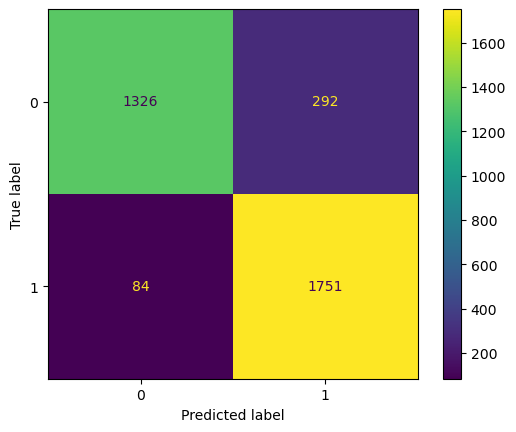

In [9]:
predictions = bagging.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [10]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

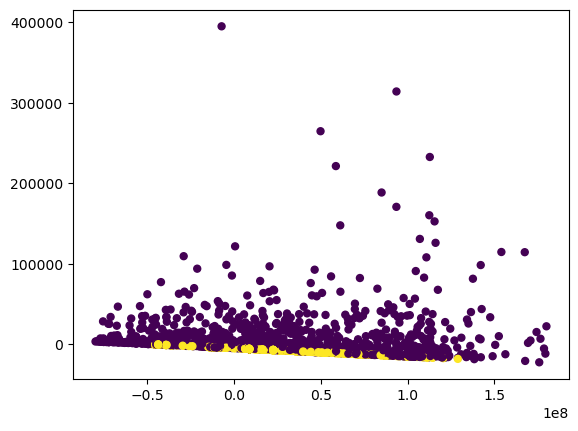

In [11]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

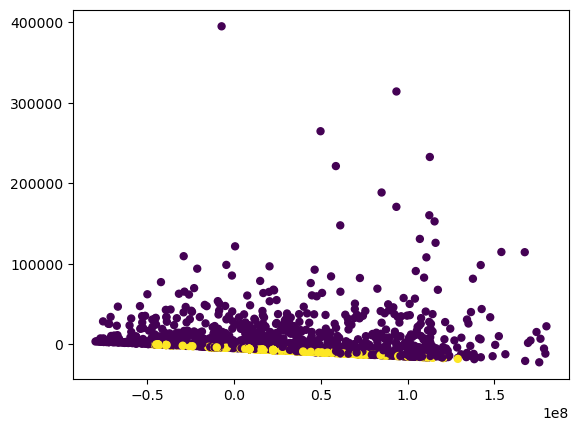

In [12]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

## Extremely Randomized Trees

In [ ]:
param_grid = {'max_features': ['sqrt', 'log2', None],
              'min_samples_split': [1, 2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4],
              'n_estimators': np.arange(50, 200, 10),
              'ccp_alpha': [0, 0.1, 0.05, 0.3, 0.5],
              'min_weight_fraction_leaf': [0, 0.1, 0.05, 0.3, 0.5],
              'criterion' :['gini', 'entropy', 'log_loss']
             }

ert = ExtraTreesClassifier()

grid = GridSearchCV(
    ert,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

In [ ]:
ert = grid.best_estimator_
ert

In [ ]:
train_pred = ert.predict(train_set)
test_pred = ert.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

In [ ]:
report_scores(test_label,test_pred)

In [ ]:
predictions = ert.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

In [ ]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

In [ ]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

## AdaBoost

In [13]:
param_grid = {'n_estimators': np.arange(5, 150, 5),
              'learning_rate': [0.8, 0.9, 1.0, 1.1, 1.2],
              'algorithm': ['SAMME', 'SAMME.R'],
             }

ada = AdaBoostClassifier()

grid = GridSearchCV(
    ada,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

Fitting 3 folds for each of 290 candidates, totalling 870 fits
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=5;, score=0.843 total time=   0.0s
[CV 2/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=5;, score=0.855 total time=   0.0s
[CV 3/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=5;, score=0.854 total time=   0.0s
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=10;, score=0.843 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=10;, score=0.855 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=10;, score=0.854 total time=   0.1s
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=15;, score=0.884 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=15;, score=0.863 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=15;, score=0.891 total time=   0.1s
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimat

[CV 3/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=140;, score=0.892 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=145;, score=0.885 total time=   0.7s
[CV 2/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=145;, score=0.900 total time=   0.7s
[CV 3/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=145;, score=0.892 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=5;, score=0.843 total time=   0.0s
[CV 2/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=5;, score=0.855 total time=   0.0s
[CV 3/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=5;, score=0.854 total time=   0.0s
[CV 1/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=10;, score=0.884 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=10;, score=0.855 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=10;, score=0.891 total time=   0.1s
[CV 1/3] END algori

[CV 3/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=135;, score=0.892 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=140;, score=0.886 total time=   0.7s
[CV 2/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=140;, score=0.901 total time=   0.7s
[CV 3/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=140;, score=0.892 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=145;, score=0.885 total time=   0.8s
[CV 2/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=145;, score=0.902 total time=   0.8s
[CV 3/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=145;, score=0.893 total time=   0.8s
[CV 1/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=5;, score=0.843 total time=   0.0s
[CV 2/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=5;, score=0.855 total time=   0.0s
[CV 3/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=5;, score=0.854 total time=   0.0s
[CV 1/3] END alg

[CV 3/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=130;, score=0.893 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=135;, score=0.885 total time=   0.7s
[CV 2/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=135;, score=0.902 total time=   0.7s
[CV 3/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=135;, score=0.892 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=140;, score=0.885 total time=   0.7s
[CV 2/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=140;, score=0.902 total time=   0.7s
[CV 3/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=140;, score=0.893 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=145;, score=0.886 total time=   0.8s
[CV 2/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=145;, score=0.902 total time=   0.8s
[CV 3/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=145;, score=0.893 total time=   0.8s
[CV 1/3] E

[CV 3/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=125;, score=0.892 total time=   0.6s
[CV 1/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=130;, score=0.884 total time=   0.7s
[CV 2/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=130;, score=0.902 total time=   0.7s
[CV 3/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=130;, score=0.892 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=135;, score=0.884 total time=   0.7s
[CV 2/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=135;, score=0.902 total time=   0.7s
[CV 3/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=135;, score=0.892 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=140;, score=0.884 total time=   0.7s
[CV 2/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=140;, score=0.902 total time=   0.7s
[CV 3/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=140;, score=0.892 total time=   0.7s
[CV 1/3] E

[CV 3/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=120;, score=0.891 total time=   0.6s
[CV 1/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=125;, score=0.886 total time=   0.6s
[CV 2/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=125;, score=0.902 total time=   0.6s
[CV 3/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=125;, score=0.892 total time=   0.6s
[CV 1/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=130;, score=0.886 total time=   0.7s
[CV 2/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=130;, score=0.902 total time=   0.7s
[CV 3/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=130;, score=0.891 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=135;, score=0.886 total time=   0.7s
[CV 2/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=135;, score=0.902 total time=   0.7s
[CV 3/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=135;, score=0.891 total time=   0.7s
[CV 1/3] E

[CV 2/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=115;, score=0.902 total time=   0.7s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=115;, score=0.890 total time=   0.7s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=120;, score=0.884 total time=   0.7s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=120;, score=0.903 total time=   0.7s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=120;, score=0.889 total time=   0.7s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=125;, score=0.884 total time=   0.7s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=125;, score=0.902 total time=   0.7s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=125;, score=0.889 total time=   0.7s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=130;, score=0.883 total time=   0.7s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=130;, score=0.902 total tim

[CV 3/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=105;, score=0.891 total time=   0.6s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=110;, score=0.882 total time=   0.6s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=110;, score=0.902 total time=   0.6s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=110;, score=0.890 total time=   0.6s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=115;, score=0.883 total time=   0.7s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=115;, score=0.902 total time=   0.6s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=115;, score=0.890 total time=   0.7s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=120;, score=0.883 total time=   0.7s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=120;, score=0.903 total time=   0.7s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=120;, score=0.889 total tim

[CV 1/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100;, score=0.883 total time=   0.6s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100;, score=0.901 total time=   0.6s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100;, score=0.890 total time=   0.6s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=105;, score=0.883 total time=   0.6s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=105;, score=0.899 total time=   0.6s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=105;, score=0.889 total time=   0.6s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=110;, score=0.884 total time=   0.6s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=110;, score=0.900 total time=   0.6s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=110;, score=0.888 total time=   0.6s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=115;, score=0.883 total tim

[CV 2/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=90;, score=0.901 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=90;, score=0.886 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=95;, score=0.879 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=95;, score=0.901 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=95;, score=0.885 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=100;, score=0.880 total time=   0.6s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=100;, score=0.901 total time=   0.6s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=100;, score=0.886 total time=   0.6s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=105;, score=0.879 total time=   0.6s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=105;, score=0.900 total time=   

[CV 3/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=80;, score=0.886 total time=   0.4s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=85;, score=0.878 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=85;, score=0.900 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=85;, score=0.886 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=90;, score=0.879 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=90;, score=0.900 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=90;, score=0.884 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=95;, score=0.878 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=95;, score=0.900 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=95;, score=0.885 total time=   0.5s


GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.8, 0.9, 1.0, 1.1, 1.2],
                         'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145])},
             scoring='accuracy', verbose=4)

In [14]:
ada = grid.best_estimator_
ada

AdaBoostClassifier(learning_rate=0.8, n_estimators=15)

In [15]:
train_pred = ada.predict(train_set)
test_pred = ada.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.8952203600248293
Accuracy test set  0.9003764842166232
Precision train set  0.9120273692901966
Recall train set  0.8952203600248293
F1 score train set  0.8933627806286065
Support train set  (array([0.99829932, 0.83597263]), array([0.77768945, 0.99883205]), array([0.87429252, 0.91017454]), array([3774, 4281]))


In [16]:
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.99      0.79      0.88      1618
         >50       0.84      1.00      0.91      1835

    accuracy                           0.90      3453
   macro avg       0.92      0.89      0.90      3453
weighted avg       0.91      0.90      0.90      3453



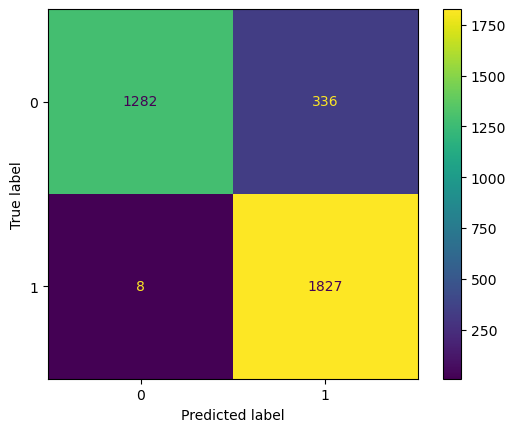

In [17]:
predictions = ada.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [18]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

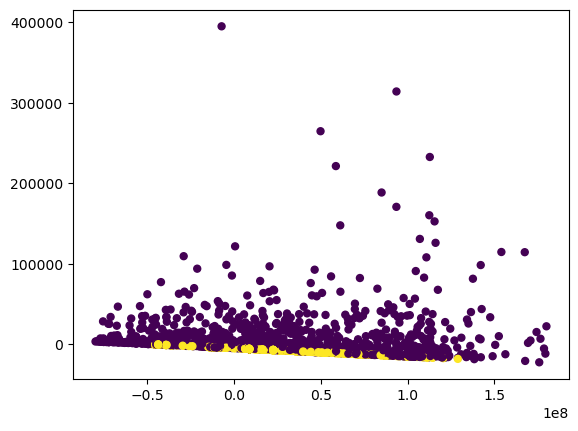

In [19]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

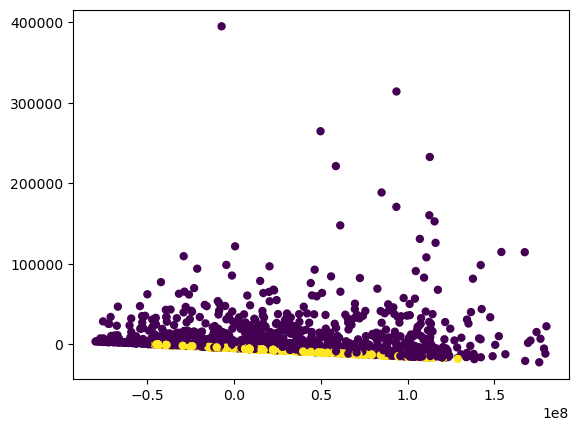

In [20]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

## Gradient Tree Boosting

In [ ]:
param_grid = {
    
             }

gbc = GradientBoostingClassifier()

grid = GridSearchCV(
    gbc,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

In [ ]:
gbc = grid.best_estimator_
gbc

In [ ]:
train_pred = gbc.predict(train_set)
test_pred = gbc.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

In [ ]:
report_scores(test_label,test_pred)

In [ ]:
predictions = gbc.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

In [ ]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

In [ ]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

##  Histogram-Based Gradient Boosting

In [ ]:
param_grid = {
    
             }

hgbc = HistGradientBoostingClassifier()

grid = GridSearchCV(
    hgbc,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

In [ ]:
hgbc = grid.best_estimator_
hgbc

In [ ]:
train_pred = hgbc.predict(train_set)
test_pred = hgbc.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

In [ ]:
report_scores(test_label,test_pred)

In [ ]:
predictions = hgbc.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

In [ ]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

In [ ]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

## Save models

In [22]:
with open("models_checkpoints/bagging_lang.bin", "wb") as f:
    pickle.dump(bagging, f)
    
with open("models_checkpoints/adaboost_lang.bin", "wb") as f:
    pickle.dump(ada, f)

## Removed "lang" attribute for classification

In [27]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

data.drop(columns=['lang'])

,name,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903
2358850842,Lourie Botton,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495
137959629,Dadan Syarifudin,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008
2571493866,MBK Ebook,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911861962,Madrid Lae Maika .,0,2019-11-29 13:16:02,1126,52.677158,12.767086,0.024281,0.775180,0.192446,0.0,0.0,0.053058,0.250664,0.297762,0.043478,58.838683
1378532629,Clau Sato,0,2018-04-27 03:01:58,3024,59.716210,12.984608,0.088504,0.524772,0.114959,0.0,0.0,0.199134,0.506598,0.773291,4.565176,34.533536
126984069,ALMA LETICIA NUÑO,0,2015-03-29 17:01:24,6,67.666667,15.833333,0.005109,0.333333,0.333333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2383025796,Minnie Guadagno,1,2019-03-13 02:44:13,42,63.278846,13.971154,0.000000,0.365385,0.009615,0.0,0.0,0.076923,0.266469,0.391244,0.067308,0.286371


In [28]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std']


## Bagging

In [29]:
param_grid = {
                'n_estimators': np.arange(2, 40, 1),
                'max_features': [0.7, 0.8, 0.85, 0.9, 1.0],
                'max_samples': [0.7, 0.8, 0.85, 0.9, 1.0]
             }

bagging = BaggingClassifier()

grid = GridSearchCV(
    bagging,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

Fitting 3 folds for each of 950 candidates, totalling 2850 fits
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.809 total time=   0.0s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.816 total time=   0.0s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=2;, score=0.682 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=3;, score=0.867 total time=   0.0s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=3;, score=0.869 total time=   0.0s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=3;, score=0.806 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=4;, score=0.835 total time=   0.0s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=4;, score=0.845 total time=   0.0s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=4;, score=0.842 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=5;, score=0

[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=30;, score=0.888 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=30;, score=0.898 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=31;, score=0.895 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=31;, score=0.887 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=31;, score=0.901 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=32;, score=0.891 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=32;, score=0.884 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=0.7, n_estimators=32;, score=0.898 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=0.7, n_estimators=33;, score=0.896 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=0.7, n_estimators=33;, score=0.889 total time=   0.4s
[CV 3/3] END max_features=0.7,

[CV 3/3] END max_features=0.7, max_samples=0.8, n_estimators=20;, score=0.889 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=0.8, n_estimators=21;, score=0.894 total time=   0.3s
[CV 2/3] END max_features=0.7, max_samples=0.8, n_estimators=21;, score=0.888 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=0.8, n_estimators=21;, score=0.896 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=0.8, n_estimators=22;, score=0.894 total time=   0.3s
[CV 2/3] END max_features=0.7, max_samples=0.8, n_estimators=22;, score=0.883 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=0.8, n_estimators=22;, score=0.895 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=0.8, n_estimators=23;, score=0.890 total time=   0.3s
[CV 2/3] END max_features=0.7, max_samples=0.8, n_estimators=23;, score=0.884 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=0.8, n_estimators=23;, score=0.893 total time=   0.3s
[CV 1/3] END max_features=0.7,

[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=11;, score=0.882 total time=   0.2s
[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=11;, score=0.880 total time=   0.2s
[CV 3/3] END max_features=0.7, max_samples=0.85, n_estimators=11;, score=0.890 total time=   0.2s
[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=12;, score=0.841 total time=   0.2s
[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=12;, score=0.878 total time=   0.2s
[CV 3/3] END max_features=0.7, max_samples=0.85, n_estimators=12;, score=0.889 total time=   0.2s
[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=13;, score=0.867 total time=   0.2s
[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=13;, score=0.888 total time=   0.2s
[CV 3/3] END max_features=0.7, max_samples=0.85, n_estimators=13;, score=0.890 total time=   0.2s
[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=14;, score=0.889 total time=   0.2s
[CV 2/3] END max_fea

[CV 1/3] END max_features=0.7, max_samples=0.85, n_estimators=39;, score=0.893 total time=   0.6s
[CV 2/3] END max_features=0.7, max_samples=0.85, n_estimators=39;, score=0.888 total time=   0.6s
[CV 3/3] END max_features=0.7, max_samples=0.85, n_estimators=39;, score=0.899 total time=   0.6s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=2;, score=0.791 total time=   0.0s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=2;, score=0.755 total time=   0.0s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=2;, score=0.773 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=3;, score=0.859 total time=   0.0s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=3;, score=0.858 total time=   0.0s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=3;, score=0.867 total time=   0.0s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=4;, score=0.771 total time=   0.1s
[CV 2/3] END max_features=0.7, max

[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=29;, score=0.889 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=29;, score=0.896 total time=   0.5s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=30;, score=0.891 total time=   0.5s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=30;, score=0.879 total time=   0.5s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=30;, score=0.897 total time=   0.5s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=31;, score=0.898 total time=   0.5s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=31;, score=0.892 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=0.9, n_estimators=31;, score=0.899 total time=   0.5s
[CV 1/3] END max_features=0.7, max_samples=0.9, n_estimators=32;, score=0.895 total time=   0.5s
[CV 2/3] END max_features=0.7, max_samples=0.9, n_estimators=32;, score=0.889 total time=   0.5s
[CV 3/3] END max_features=0.7,

[CV 3/3] END max_features=0.7, max_samples=1.0, n_estimators=19;, score=0.898 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.892 total time=   0.3s
[CV 2/3] END max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.885 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=1.0, n_estimators=20;, score=0.879 total time=   0.3s
[CV 1/3] END max_features=0.7, max_samples=1.0, n_estimators=21;, score=0.890 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=1.0, n_estimators=21;, score=0.891 total time=   0.3s
[CV 3/3] END max_features=0.7, max_samples=1.0, n_estimators=21;, score=0.890 total time=   0.4s
[CV 1/3] END max_features=0.7, max_samples=1.0, n_estimators=22;, score=0.889 total time=   0.4s
[CV 2/3] END max_features=0.7, max_samples=1.0, n_estimators=22;, score=0.883 total time=   0.4s
[CV 3/3] END max_features=0.7, max_samples=1.0, n_estimators=22;, score=0.886 total time=   0.3s
[CV 1/3] END max_features=0.7,

[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=10;, score=0.869 total time=   0.1s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=10;, score=0.872 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=11;, score=0.882 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=11;, score=0.883 total time=   0.1s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=11;, score=0.885 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=12;, score=0.874 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=12;, score=0.878 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=12;, score=0.877 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=13;, score=0.889 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=13;, score=0.883 total time=   0.2s
[CV 3/3] END max_features=0.8,

[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=38;, score=0.900 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=0.7, n_estimators=39;, score=0.895 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=0.7, n_estimators=39;, score=0.892 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=0.7, n_estimators=39;, score=0.899 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=2;, score=0.809 total time=   0.0s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=2;, score=0.682 total time=   0.0s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=2;, score=0.774 total time=   0.0s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=3;, score=0.867 total time=   0.0s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=3;, score=0.867 total time=   0.1s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=3;, score=0.796 total time=   0.1s
[CV 1/3] END max_features=0.8, max_s

[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=29;, score=0.892 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=29;, score=0.890 total time=   0.4s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=29;, score=0.893 total time=   0.4s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=30;, score=0.893 total time=   0.4s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=30;, score=0.893 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=30;, score=0.895 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=31;, score=0.888 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=0.8, n_estimators=31;, score=0.893 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=0.8, n_estimators=31;, score=0.895 total time=   0.4s
[CV 1/3] END max_features=0.8, max_samples=0.8, n_estimators=32;, score=0.899 total time=   0.5s
[CV 2/3] END max_features=0.8,

[CV 2/3] END max_features=0.8, max_samples=0.85, n_estimators=19;, score=0.883 total time=   0.3s
[CV 3/3] END max_features=0.8, max_samples=0.85, n_estimators=19;, score=0.892 total time=   0.3s
[CV 1/3] END max_features=0.8, max_samples=0.85, n_estimators=20;, score=0.883 total time=   0.3s
[CV 2/3] END max_features=0.8, max_samples=0.85, n_estimators=20;, score=0.889 total time=   0.3s
[CV 3/3] END max_features=0.8, max_samples=0.85, n_estimators=20;, score=0.891 total time=   0.4s
[CV 1/3] END max_features=0.8, max_samples=0.85, n_estimators=21;, score=0.891 total time=   0.4s
[CV 2/3] END max_features=0.8, max_samples=0.85, n_estimators=21;, score=0.884 total time=   0.4s
[CV 3/3] END max_features=0.8, max_samples=0.85, n_estimators=21;, score=0.900 total time=   0.3s
[CV 1/3] END max_features=0.8, max_samples=0.85, n_estimators=22;, score=0.888 total time=   0.3s
[CV 2/3] END max_features=0.8, max_samples=0.85, n_estimators=22;, score=0.888 total time=   0.4s
[CV 3/3] END max_fea

[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=9;, score=0.885 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=10;, score=0.863 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=10;, score=0.872 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=10;, score=0.878 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=11;, score=0.882 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=11;, score=0.883 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=11;, score=0.888 total time=   0.2s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=12;, score=0.869 total time=   0.2s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=12;, score=0.867 total time=   0.2s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=12;, score=0.880 total time=   0.2s
[CV 1/3] END max_features=0.8, 

[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=38;, score=0.896 total time=   0.6s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=38;, score=0.887 total time=   0.6s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=38;, score=0.895 total time=   0.7s
[CV 1/3] END max_features=0.8, max_samples=0.9, n_estimators=39;, score=0.891 total time=   0.7s
[CV 2/3] END max_features=0.8, max_samples=0.9, n_estimators=39;, score=0.889 total time=   0.6s
[CV 3/3] END max_features=0.8, max_samples=0.9, n_estimators=39;, score=0.899 total time=   0.7s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=2;, score=0.814 total time=   0.0s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=2;, score=0.816 total time=   0.0s
[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=2;, score=0.763 total time=   0.0s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=3;, score=0.863 total time=   0.0s
[CV 2/3] END max_features=0.8, max

[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=28;, score=0.886 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=28;, score=0.900 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=29;, score=0.898 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=29;, score=0.886 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=29;, score=0.895 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=30;, score=0.888 total time=   0.6s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=30;, score=0.889 total time=   0.5s
[CV 3/3] END max_features=0.8, max_samples=1.0, n_estimators=30;, score=0.897 total time=   0.5s
[CV 1/3] END max_features=0.8, max_samples=1.0, n_estimators=31;, score=0.894 total time=   0.5s
[CV 2/3] END max_features=0.8, max_samples=1.0, n_estimators=31;, score=0.885 total time=   0.5s
[CV 3/3] END max_features=0.8,

[CV 3/3] END max_features=0.85, max_samples=0.7, n_estimators=18;, score=0.885 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.7, n_estimators=19;, score=0.892 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.7, n_estimators=19;, score=0.883 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.7, n_estimators=19;, score=0.895 total time=   0.2s
[CV 1/3] END max_features=0.85, max_samples=0.7, n_estimators=20;, score=0.892 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.7, n_estimators=20;, score=0.882 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.7, n_estimators=20;, score=0.889 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.7, n_estimators=21;, score=0.894 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.7, n_estimators=21;, score=0.889 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.7, n_estimators=21;, score=0.899 total time=   0.3s
[CV 1/3] END max_fea

[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=9;, score=0.874 total time=   0.1s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=9;, score=0.878 total time=   0.1s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=9;, score=0.893 total time=   0.1s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=10;, score=0.863 total time=   0.2s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=10;, score=0.878 total time=   0.2s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=10;, score=0.874 total time=   0.2s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=11;, score=0.888 total time=   0.2s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=11;, score=0.884 total time=   0.2s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=11;, score=0.891 total time=   0.2s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=12;, score=0.870 total time=   0.2s
[CV 2/3] END max_featur

[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=37;, score=0.900 total time=   0.6s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=37;, score=0.888 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=37;, score=0.895 total time=   0.6s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=38;, score=0.895 total time=   0.7s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=38;, score=0.893 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=38;, score=0.898 total time=   0.6s
[CV 1/3] END max_features=0.85, max_samples=0.8, n_estimators=39;, score=0.899 total time=   0.6s
[CV 2/3] END max_features=0.85, max_samples=0.8, n_estimators=39;, score=0.893 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=0.8, n_estimators=39;, score=0.902 total time=   0.6s
[CV 1/3] END max_features=0.85, max_samples=0.85, n_estimators=2;, score=0.809 total time=   0.0s
[CV 2/3] END max_fea

[CV 1/3] END max_features=0.85, max_samples=0.85, n_estimators=27;, score=0.894 total time=   0.4s
[CV 2/3] END max_features=0.85, max_samples=0.85, n_estimators=27;, score=0.889 total time=   0.4s
[CV 3/3] END max_features=0.85, max_samples=0.85, n_estimators=27;, score=0.898 total time=   0.4s
[CV 1/3] END max_features=0.85, max_samples=0.85, n_estimators=28;, score=0.893 total time=   0.4s
[CV 2/3] END max_features=0.85, max_samples=0.85, n_estimators=28;, score=0.888 total time=   0.4s
[CV 3/3] END max_features=0.85, max_samples=0.85, n_estimators=28;, score=0.893 total time=   0.5s
[CV 1/3] END max_features=0.85, max_samples=0.85, n_estimators=29;, score=0.893 total time=   0.4s
[CV 2/3] END max_features=0.85, max_samples=0.85, n_estimators=29;, score=0.886 total time=   0.5s
[CV 3/3] END max_features=0.85, max_samples=0.85, n_estimators=29;, score=0.896 total time=   0.4s
[CV 1/3] END max_features=0.85, max_samples=0.85, n_estimators=30;, score=0.889 total time=   0.4s
[CV 2/3] E

[CV 1/3] END max_features=0.85, max_samples=0.9, n_estimators=17;, score=0.890 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.9, n_estimators=17;, score=0.888 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.9, n_estimators=17;, score=0.896 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.9, n_estimators=18;, score=0.882 total time=   0.4s
[CV 2/3] END max_features=0.85, max_samples=0.9, n_estimators=18;, score=0.880 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.9, n_estimators=18;, score=0.885 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.9, n_estimators=19;, score=0.892 total time=   0.3s
[CV 2/3] END max_features=0.85, max_samples=0.9, n_estimators=19;, score=0.884 total time=   0.3s
[CV 3/3] END max_features=0.85, max_samples=0.9, n_estimators=19;, score=0.892 total time=   0.3s
[CV 1/3] END max_features=0.85, max_samples=0.9, n_estimators=20;, score=0.883 total time=   0.3s
[CV 2/3] END max_fea

[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=7;, score=0.868 total time=   0.2s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=7;, score=0.881 total time=   0.1s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=8;, score=0.869 total time=   0.1s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=8;, score=0.866 total time=   0.1s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=8;, score=0.876 total time=   0.1s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=9;, score=0.876 total time=   0.2s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=9;, score=0.869 total time=   0.2s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=9;, score=0.880 total time=   0.2s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=10;, score=0.862 total time=   0.2s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=10;, score=0.878 total time=   0.2s
[CV 3/3] END max_features=0.

[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=35;, score=0.891 total time=   0.6s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=35;, score=0.896 total time=   0.6s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=36;, score=0.892 total time=   0.7s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=36;, score=0.889 total time=   0.7s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=36;, score=0.898 total time=   0.6s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=37;, score=0.893 total time=   0.7s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=37;, score=0.891 total time=   0.7s
[CV 3/3] END max_features=0.85, max_samples=1.0, n_estimators=37;, score=0.901 total time=   0.7s
[CV 1/3] END max_features=0.85, max_samples=1.0, n_estimators=38;, score=0.894 total time=   0.7s
[CV 2/3] END max_features=0.85, max_samples=1.0, n_estimators=38;, score=0.888 total time=   0.7s
[CV 3/3] END max_fea

[CV 3/3] END max_features=0.9, max_samples=0.7, n_estimators=25;, score=0.895 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.7, n_estimators=26;, score=0.891 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.7, n_estimators=26;, score=0.883 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.7, n_estimators=26;, score=0.892 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.7, n_estimators=27;, score=0.896 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.7, n_estimators=27;, score=0.894 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.7, n_estimators=27;, score=0.896 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.7, n_estimators=28;, score=0.897 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.7, n_estimators=28;, score=0.886 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.7, n_estimators=28;, score=0.896 total time=   0.4s
[CV 1/3] END max_features=0.9,

[CV 1/3] END max_features=0.9, max_samples=0.8, n_estimators=16;, score=0.886 total time=   0.2s
[CV 2/3] END max_features=0.9, max_samples=0.8, n_estimators=16;, score=0.883 total time=   0.2s
[CV 3/3] END max_features=0.9, max_samples=0.8, n_estimators=16;, score=0.888 total time=   0.2s
[CV 1/3] END max_features=0.9, max_samples=0.8, n_estimators=17;, score=0.886 total time=   0.2s
[CV 2/3] END max_features=0.9, max_samples=0.8, n_estimators=17;, score=0.879 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=0.8, n_estimators=17;, score=0.891 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=0.8, n_estimators=18;, score=0.888 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=0.8, n_estimators=18;, score=0.880 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=0.8, n_estimators=18;, score=0.889 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=0.8, n_estimators=19;, score=0.888 total time=   0.3s
[CV 2/3] END max_features=0.9,

[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=6;, score=0.855 total time=   0.1s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=6;, score=0.868 total time=   0.1s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=7;, score=0.888 total time=   0.1s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=7;, score=0.880 total time=   0.1s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=7;, score=0.879 total time=   0.1s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=8;, score=0.870 total time=   0.1s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=8;, score=0.863 total time=   0.1s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=8;, score=0.866 total time=   0.1s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=9;, score=0.878 total time=   0.2s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=9;, score=0.879 total time=   0.1s
[CV 3/3] END max_features=0.9,

[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=34;, score=0.886 total time=   0.6s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=34;, score=0.898 total time=   0.6s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=35;, score=0.896 total time=   0.6s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=35;, score=0.889 total time=   0.6s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=35;, score=0.899 total time=   0.6s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=36;, score=0.895 total time=   0.6s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=36;, score=0.890 total time=   0.7s
[CV 3/3] END max_features=0.9, max_samples=0.85, n_estimators=36;, score=0.897 total time=   0.6s
[CV 1/3] END max_features=0.9, max_samples=0.85, n_estimators=37;, score=0.896 total time=   0.6s
[CV 2/3] END max_features=0.9, max_samples=0.85, n_estimators=37;, score=0.892 total time=   0.6s
[CV 3/3] END max_fea

[CV 3/3] END max_features=0.9, max_samples=0.9, n_estimators=24;, score=0.889 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.9, n_estimators=25;, score=0.893 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.9, n_estimators=25;, score=0.888 total time=   0.4s
[CV 3/3] END max_features=0.9, max_samples=0.9, n_estimators=25;, score=0.892 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.9, n_estimators=26;, score=0.885 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.9, n_estimators=26;, score=0.886 total time=   0.5s
[CV 3/3] END max_features=0.9, max_samples=0.9, n_estimators=26;, score=0.893 total time=   0.4s
[CV 1/3] END max_features=0.9, max_samples=0.9, n_estimators=27;, score=0.892 total time=   0.4s
[CV 2/3] END max_features=0.9, max_samples=0.9, n_estimators=27;, score=0.889 total time=   0.5s
[CV 3/3] END max_features=0.9, max_samples=0.9, n_estimators=27;, score=0.895 total time=   0.4s
[CV 1/3] END max_features=0.9,

[CV 1/3] END max_features=0.9, max_samples=1.0, n_estimators=15;, score=0.889 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=1.0, n_estimators=15;, score=0.887 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=1.0, n_estimators=15;, score=0.888 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=1.0, n_estimators=16;, score=0.879 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=1.0, n_estimators=16;, score=0.882 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=1.0, n_estimators=16;, score=0.889 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=1.0, n_estimators=17;, score=0.891 total time=   0.3s
[CV 2/3] END max_features=0.9, max_samples=1.0, n_estimators=17;, score=0.885 total time=   0.3s
[CV 3/3] END max_features=0.9, max_samples=1.0, n_estimators=17;, score=0.895 total time=   0.3s
[CV 1/3] END max_features=0.9, max_samples=1.0, n_estimators=18;, score=0.883 total time=   0.3s
[CV 2/3] END max_features=0.9,

[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=5;, score=0.881 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=6;, score=0.859 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=6;, score=0.856 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=6;, score=0.872 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=7;, score=0.876 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=7;, score=0.880 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=7;, score=0.886 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=8;, score=0.866 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=8;, score=0.874 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=8;, score=0.879 total time=   0.1s
[CV 1/3] END max_features=1.0, max_sampl

[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=34;, score=0.893 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=34;, score=0.887 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=34;, score=0.894 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=35;, score=0.894 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=35;, score=0.896 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=35;, score=0.895 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=36;, score=0.893 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=0.7, n_estimators=36;, score=0.890 total time=   0.6s
[CV 3/3] END max_features=1.0, max_samples=0.7, n_estimators=36;, score=0.893 total time=   0.6s
[CV 1/3] END max_features=1.0, max_samples=0.7, n_estimators=37;, score=0.895 total time=   0.5s
[CV 2/3] END max_features=1.0,

[CV 2/3] END max_features=1.0, max_samples=0.8, n_estimators=24;, score=0.887 total time=   0.4s
[CV 3/3] END max_features=1.0, max_samples=0.8, n_estimators=24;, score=0.893 total time=   0.4s
[CV 1/3] END max_features=1.0, max_samples=0.8, n_estimators=25;, score=0.894 total time=   0.4s
[CV 2/3] END max_features=1.0, max_samples=0.8, n_estimators=25;, score=0.890 total time=   0.4s
[CV 3/3] END max_features=1.0, max_samples=0.8, n_estimators=25;, score=0.895 total time=   0.4s
[CV 1/3] END max_features=1.0, max_samples=0.8, n_estimators=26;, score=0.887 total time=   0.4s
[CV 2/3] END max_features=1.0, max_samples=0.8, n_estimators=26;, score=0.889 total time=   0.4s
[CV 3/3] END max_features=1.0, max_samples=0.8, n_estimators=26;, score=0.892 total time=   0.4s
[CV 1/3] END max_features=1.0, max_samples=0.8, n_estimators=27;, score=0.893 total time=   0.4s
[CV 2/3] END max_features=1.0, max_samples=0.8, n_estimators=27;, score=0.888 total time=   0.5s
[CV 3/3] END max_features=1.0,

[CV 3/3] END max_features=1.0, max_samples=0.85, n_estimators=14;, score=0.883 total time=   0.2s
[CV 1/3] END max_features=1.0, max_samples=0.85, n_estimators=15;, score=0.891 total time=   0.3s
[CV 2/3] END max_features=1.0, max_samples=0.85, n_estimators=15;, score=0.885 total time=   0.3s
[CV 3/3] END max_features=1.0, max_samples=0.85, n_estimators=15;, score=0.888 total time=   0.3s
[CV 1/3] END max_features=1.0, max_samples=0.85, n_estimators=16;, score=0.880 total time=   0.3s
[CV 2/3] END max_features=1.0, max_samples=0.85, n_estimators=16;, score=0.884 total time=   0.3s
[CV 3/3] END max_features=1.0, max_samples=0.85, n_estimators=16;, score=0.881 total time=   0.3s
[CV 1/3] END max_features=1.0, max_samples=0.85, n_estimators=17;, score=0.891 total time=   0.3s
[CV 2/3] END max_features=1.0, max_samples=0.85, n_estimators=17;, score=0.887 total time=   0.3s
[CV 3/3] END max_features=1.0, max_samples=0.85, n_estimators=17;, score=0.892 total time=   0.3s
[CV 1/3] END max_fea

[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=5;, score=0.870 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=5;, score=0.874 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=6;, score=0.863 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=6;, score=0.853 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=6;, score=0.867 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=7;, score=0.882 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=7;, score=0.872 total time=   0.1s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=7;, score=0.877 total time=   0.1s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=8;, score=0.867 total time=   0.1s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=8;, score=0.868 total time=   0.2s
[CV 3/3] END max_features=1.0, max_sampl

[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=33;, score=0.899 total time=   0.6s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=34;, score=0.891 total time=   0.6s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=34;, score=0.888 total time=   0.6s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=34;, score=0.893 total time=   0.6s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=35;, score=0.894 total time=   0.6s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=35;, score=0.888 total time=   0.6s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=35;, score=0.892 total time=   0.6s
[CV 1/3] END max_features=1.0, max_samples=0.9, n_estimators=36;, score=0.887 total time=   0.6s
[CV 2/3] END max_features=1.0, max_samples=0.9, n_estimators=36;, score=0.885 total time=   0.7s
[CV 3/3] END max_features=1.0, max_samples=0.9, n_estimators=36;, score=0.893 total time=   0.7s
[CV 1/3] END max_features=1.0,

[CV 1/3] END max_features=1.0, max_samples=1.0, n_estimators=24;, score=0.886 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=1.0, n_estimators=24;, score=0.886 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=1.0, n_estimators=24;, score=0.889 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=1.0, n_estimators=25;, score=0.891 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=1.0, n_estimators=25;, score=0.891 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=1.0, n_estimators=25;, score=0.896 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=1.0, n_estimators=26;, score=0.887 total time=   0.5s
[CV 2/3] END max_features=1.0, max_samples=1.0, n_estimators=26;, score=0.887 total time=   0.5s
[CV 3/3] END max_features=1.0, max_samples=1.0, n_estimators=26;, score=0.893 total time=   0.5s
[CV 1/3] END max_features=1.0, max_samples=1.0, n_estimators=27;, score=0.888 total time=   0.5s
[CV 2/3] END max_features=1.0,

GridSearchCV(cv=3, estimator=BaggingClassifier(),
             param_grid={'max_features': [0.7, 0.8, 0.85, 0.9, 1.0],
                         'max_samples': [0.7, 0.8, 0.85, 0.9, 1.0],
                         'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])},
             scoring='accuracy', verbose=4)

In [30]:
bagging = grid.best_estimator_
bagging

BaggingClassifier(max_features=0.85, max_samples=0.8, n_estimators=39)

In [31]:
train_pred = bagging.predict(train_set)
test_pred = bagging.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9985102420856611
Accuracy test set  0.8867651317694758
Precision train set  0.9985144063286082
Recall train set  0.9985102420856611
F1 score train set  0.9985100984904567
Support train set  (array([1.        , 0.99720475]), array([0.99682035, 1.        ]), array([0.99840764, 0.99860042]), array([3774, 4281]))


In [32]:
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.97      0.79      0.87      1618
         >50       0.84      0.97      0.90      1835

    accuracy                           0.89      3453
   macro avg       0.90      0.88      0.88      3453
weighted avg       0.90      0.89      0.89      3453



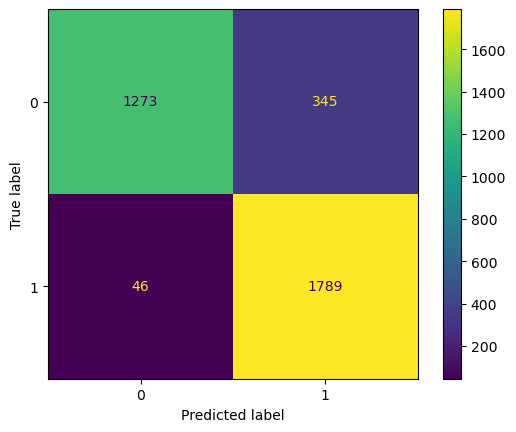

In [33]:
predictions = bagging.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [34]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

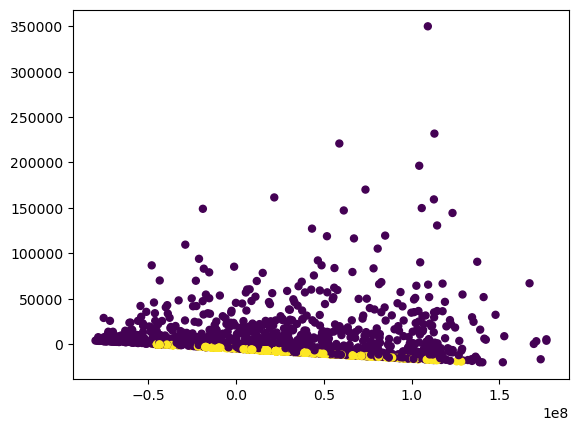

In [35]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

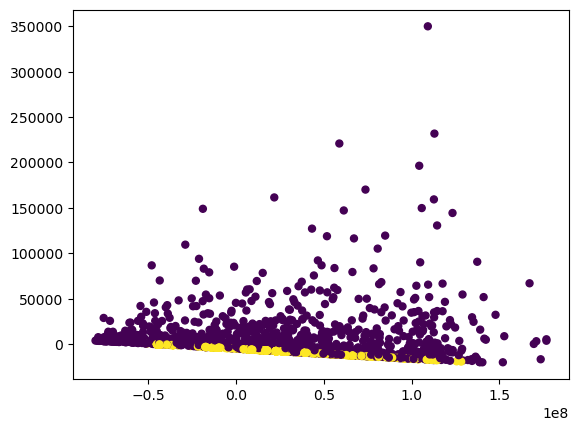

In [36]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

## AdaBoost

In [37]:
param_grid = {'n_estimators': np.arange(5, 100, 5),
              'learning_rate': [0.8, 0.9, 1.0, 1.1, 1.2],
              'algorithm': ['SAMME', 'SAMME.R'],
             }

ada = AdaBoostClassifier()

grid = GridSearchCV(
    ada,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

Fitting 3 folds for each of 190 candidates, totalling 570 fits
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=5;, score=0.857 total time=   0.0s
[CV 2/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=5;, score=0.855 total time=   0.0s
[CV 3/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=5;, score=0.856 total time=   0.0s
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=10;, score=0.857 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=10;, score=0.855 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=10;, score=0.856 total time=   0.1s
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=15;, score=0.857 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=15;, score=0.892 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.8, n_estimators=15;, score=0.856 total time=   0.1s
[CV 1/3] END algorithm=SAMME, learning_rate=0.8, n_estimat

[CV 1/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=50;, score=0.896 total time=   0.3s
[CV 2/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=50;, score=0.892 total time=   0.3s
[CV 3/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=50;, score=0.896 total time=   0.3s
[CV 1/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=55;, score=0.896 total time=   0.3s
[CV 2/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=55;, score=0.892 total time=   0.3s
[CV 3/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=55;, score=0.896 total time=   0.3s
[CV 1/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=60;, score=0.896 total time=   0.3s
[CV 2/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=60;, score=0.892 total time=   0.3s
[CV 3/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=60;, score=0.896 total time=   0.3s
[CV 1/3] END algorithm=SAMME, learning_rate=0.9, n_estimators=65;, score=0.896 total time=   0.3s
[CV 2/3] END algorit

[CV 1/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=95;, score=0.895 total time=   0.5s
[CV 2/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=95;, score=0.892 total time=   0.5s
[CV 3/3] END algorithm=SAMME, learning_rate=1.0, n_estimators=95;, score=0.898 total time=   0.5s
[CV 1/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=5;, score=0.857 total time=   0.0s
[CV 2/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=5;, score=0.855 total time=   0.0s
[CV 3/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=5;, score=0.856 total time=   0.0s
[CV 1/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=10;, score=0.896 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=10;, score=0.865 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=10;, score=0.863 total time=   0.1s
[CV 1/3] END algorithm=SAMME, learning_rate=1.1, n_estimators=15;, score=0.896 total time=   0.1s
[CV 2/3] END algorithm=

[CV 1/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=45;, score=0.896 total time=   0.2s
[CV 2/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=45;, score=0.889 total time=   0.2s
[CV 3/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=45;, score=0.895 total time=   0.2s
[CV 1/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=50;, score=0.898 total time=   0.3s
[CV 2/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=50;, score=0.888 total time=   0.3s
[CV 3/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=50;, score=0.895 total time=   0.3s
[CV 1/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=55;, score=0.898 total time=   0.3s
[CV 2/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=55;, score=0.889 total time=   0.3s
[CV 3/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=55;, score=0.896 total time=   0.3s
[CV 1/3] END algorithm=SAMME, learning_rate=1.2, n_estimators=60;, score=0.898 total time=   0.3s
[CV 2/3] END algorit

[CV 3/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=85;, score=0.900 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=90;, score=0.898 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=90;, score=0.891 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=90;, score=0.899 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=95;, score=0.897 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=95;, score=0.891 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.8, n_estimators=95;, score=0.899 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=5;, score=0.896 total time=   0.0s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=5;, score=0.893 total time=   0.0s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.9, n_estimators=5;, score=0.894 total time=   0.0s
[CV

[CV 1/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=35;, score=0.899 total time=   0.2s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=35;, score=0.888 total time=   0.2s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=35;, score=0.901 total time=   0.2s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=40;, score=0.899 total time=   0.2s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=40;, score=0.885 total time=   0.2s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=40;, score=0.901 total time=   0.2s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=45;, score=0.900 total time=   0.3s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=45;, score=0.889 total time=   0.3s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=45;, score=0.901 total time=   0.3s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=50;, score=0.900 total time=   0.3s


[CV 2/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=75;, score=0.888 total time=   0.4s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=75;, score=0.902 total time=   0.4s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=80;, score=0.899 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=80;, score=0.889 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=80;, score=0.900 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=85;, score=0.897 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=85;, score=0.889 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=85;, score=0.900 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=90;, score=0.896 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=1.1, n_estimators=90;, score=0.889 total time=   0.5s


GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.8, 0.9, 1.0, 1.1, 1.2],
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='accuracy', verbose=4)

In [38]:
ada = grid.best_estimator_
ada

AdaBoostClassifier(learning_rate=0.9, n_estimators=15)

In [39]:
train_pred = ada.predict(train_set)
test_pred = ada.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.8983240223463688
Accuracy test set  0.8934260063712713
Precision train set  0.9144768991144381
Recall train set  0.8983240223463688
F1 score train set  0.8965888808730162
Support train set  (array([0.9993241 , 0.83967818]), array([0.78351881, 0.99953282]), array([0.87836031, 0.91265863]), array([3774, 4281]))


In [40]:
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       1.00      0.77      0.87      1618
         >50       0.83      1.00      0.91      1835

    accuracy                           0.89      3453
   macro avg       0.92      0.89      0.89      3453
weighted avg       0.91      0.89      0.89      3453



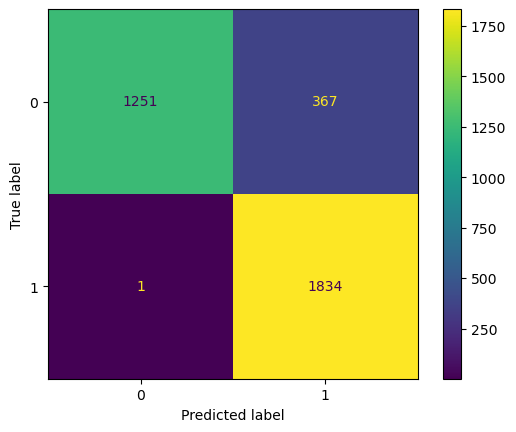

In [41]:
predictions = ada.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [42]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

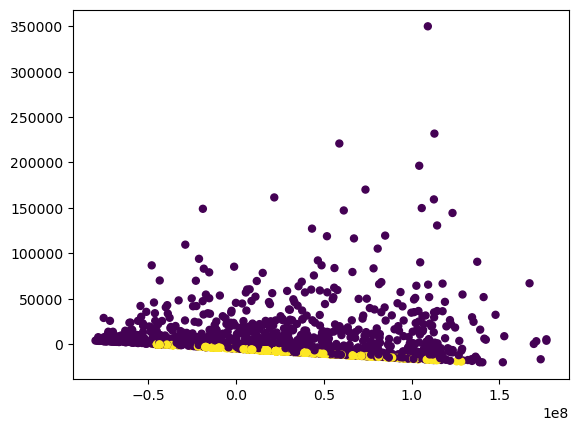

In [43]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

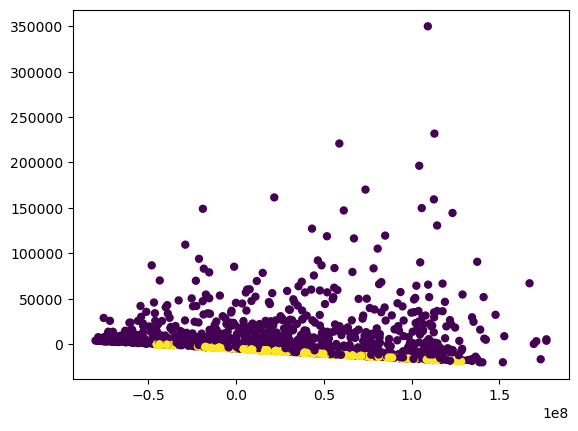

In [44]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

## Save models

In [ ]:
with open("models_checkpoints/bagging_no_lang.bin", "wb") as f:
    pickle.dump(bagging, f)
    
with open("models_checkpoints/adaboost_no_lang.bin", "wb") as f:
    pickle.dump(ada, f)